In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.models import Model,load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

from tensorflow.keras.models import Model, load_model
from tensorflow.keras import Input
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from src.custom_dataset import CustomDataset
from src.model_unet import ModelUnet
from src.validation_and_prediction import ValidationAndPrediction
from src.model_trainer import ModelTrainer

2025-04-21 16:31:57.610770: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 16:31:57.658969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-21 16:31:58.457965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
test_dataset_images_dir = "../Data/Tool_dataset/test/valid_images/"
test_dataset_masks_dir = "../Data/Tool_dataset/test/valid_masks/" 
test_dataset_binary_masks_dir = "../Data/Tool_dataset/test/binary_masks/"

test_dataset = CustomDataset(test_dataset_images_dir, test_dataset_masks_dir, test_dataset_binary_masks_dir)

test_dataframe = CustomDataset.create_df(test_dataset.image_paths, test_dataset.binary_mask_paths)
df = test_dataframe
display(df)

filename  \
0   ../Data/Tool_dataset/test/valid_images/11_2_1.png   
1   ../Data/Tool_dataset/test/valid_images/12_4_4.png   
2   ../Data/Tool_dataset/test/valid_images/12_1_3.png   
3   ../Data/Tool_dataset/test/valid_images/11_2_4.png   
4   ../Data/Tool_dataset/test/valid_images/10_1_3.png   
5   ../Data/Tool_dataset/test/valid_images/12_6_2.png   
6    ../Data/Tool_dataset/test/valid_images/9_1_1.png   
7   ../Data/Tool_dataset/test/valid_images/13_2_1.png   
8   ../Data/Tool_dataset/test/valid_images/10_2_3.png   
9   ../Data/Tool_dataset/test/valid_images/14_3_3.png   
10  ../Data/Tool_dataset/test/valid_images/13_6_4.png   
11  ../Data/Tool_dataset/test/valid_images/11_5_2.png   
12  ../Data/Tool_dataset/test/valid_images/10_5_4.png   
13   ../Data/Tool_dataset/test/valid_images/3_1_1.png   
14  ../Data/Tool_dataset/test/valid_images/10_5_2.png   
15  ../Data/Tool_dataset/test/valid_images/11_4_2.png   
16  ../Data/Tool_dataset/test/valid_images/13_3_1.png   
17  ../Data/Tool_dataset/test/valid_images/13_1_1.png   
18  ../Data/Tool_dataset/test/valid_images/11_5_4.png   
19  ../Data/Tool_dataset/test/valid_images/12_2_3.png   

                                                 mask  
0   ../Data/Tool_dataset/test/binary_masks/11_2_1_...  
1   ../Data/Tool_dataset/test/binary_masks/12_4_4_...  
2   ../Data/Tool_dataset/test/binary_masks/12_1_3_...  
3   ../Data/Tool_dataset/test/binary_masks/11_2_4_...  
4   ../Data/Tool_dataset/test/binary_masks/10_1_3_...  
5   ../Data/Tool_dataset/test/binary_masks/12_6_2_...  
6   ../Data/Tool_dataset/test/binary_masks/9_1_1_m...  
7   ../Data/Tool_dataset/test/binary_masks/13_2_1_...  
8   ../Data/Tool_dataset/test/binary_masks/10_2_3_...  
9   ../Data/Tool_dataset/test/binary_masks/14_3_3_...  
10  ../Data/Tool_dataset/test/binary_masks/13_6_4_...  
11  ../Data/Tool_dataset/test/binary_masks/11_5_2_...  
12  ../Data/Tool_dataset/test/binary_masks/10_5_4_...  
13  ../Data/Tool_dataset/test/binary_masks/3_1_1_m...  
14  ../Data/Tool_dataset/test/binary_masks/10_5_2_...  
15  ../Data/Tool_dataset/test/binary_masks/11_4_2_...  
16  ../Data/Tool_dataset/test/binary_masks/13_3_1_...  
17  ../Data/Tool_dataset/test/binary_masks/13_1_1_...  
18  ../Data/Tool_dataset/test/binary_masks/11_5_4_...  
19  ../Data/Tool_dataset/test/binary_masks/12_2_3_...

Image shape:  (1144, 2392, 3)
Mask shape:  (1144, 2392)


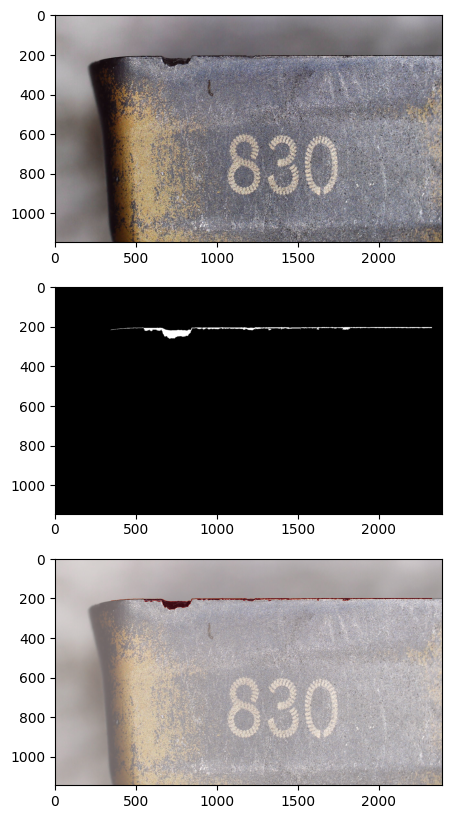

In [3]:
CustomDataset.image_display(test_dataset.image_paths, test_dataset.binary_mask_paths, 15)

Evaluating the U-Net

In [4]:
batch_size = 20
height = 256
width = 256

In [6]:
model_path = 'V_Unet/model_v1_real/tool_dataset.keras'
ModelTrainer.train_model(model_path, test_dataframe, batch_size, height, width)


# TLmodel = load_model(TLmodel_path, 
#                      custom_objects={'dice_coef_loss': ModelUnet.dice_coef_loss, 'iou': ModelUnet.iou, 'dice_coef': ModelUnet.dice_coef})
# TLmodel.compile(optimizer=Adam(learning_rate=1e-5), loss=ModelUnet.dice_coef_loss,
#                 metrics=[ModelUnet.iou, ModelUnet.dice_coef, 'binary_accuracy'])

# evaluate_gen = CustomDataset.train_generator(test_dataframe, batch_size,
#                                None, 
#                                dict(),
#                                None, None, None, None, None, 
#                                (height, width))

# results = TLmodel.evaluate(evaluate_gen, 
#                             steps=len(test_dataframe)//batch_size,
#                             verbose=1,
#                             return_dict=True)


2025-04-21 16:36:13.966241: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Found 20 validated image filenames.
Found 20 validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - binary_accuracy: 0.9946 - dice_coef: 0.8534 - iou: 0.7442 - loss: -0.8534
Evaluation scores from V-Unet TL model:
Validation loss:  -0.853357195854187
Validation dice coefficient:  0.8533572554588318
Validation iou:  0.7442269325256348
Validation accuracy:  0.9945785403251648


{'binary_accuracy': 0.9945785403251648,
 'dice_coef': 0.8533572554588318,
 'iou': 0.7442269325256348,
 'loss': -0.853357195854187}

Testing image 1 : 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


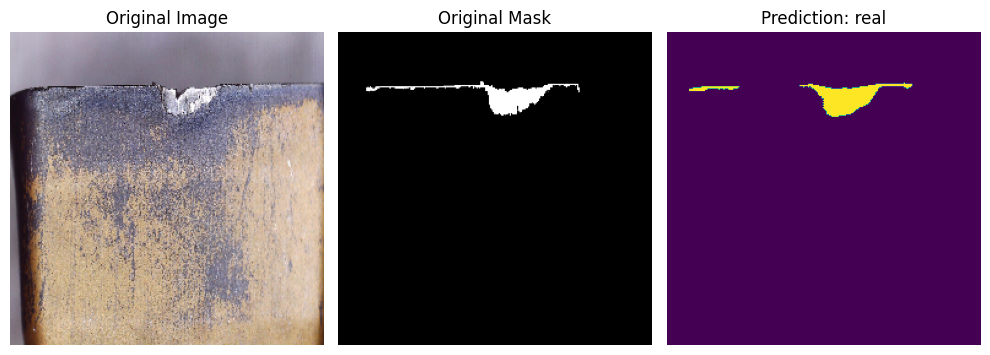

Testing image 2 : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


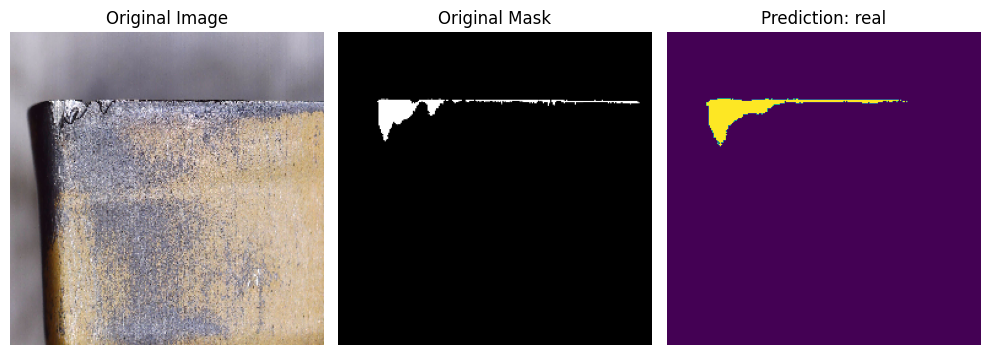

Testing image 3 : 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


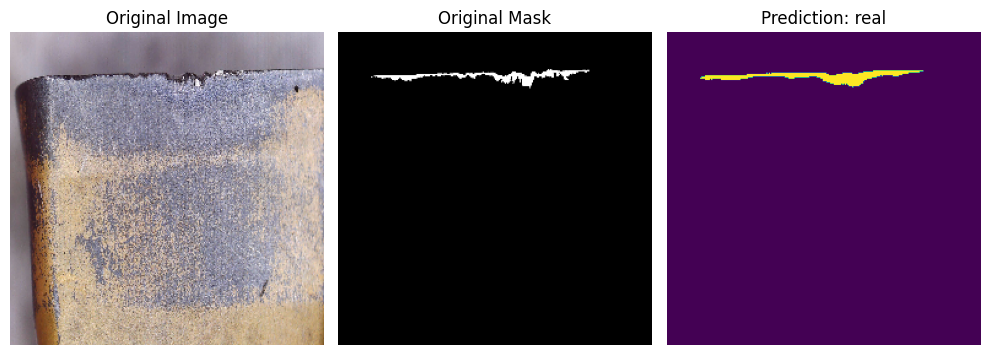

Testing image 4 : 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


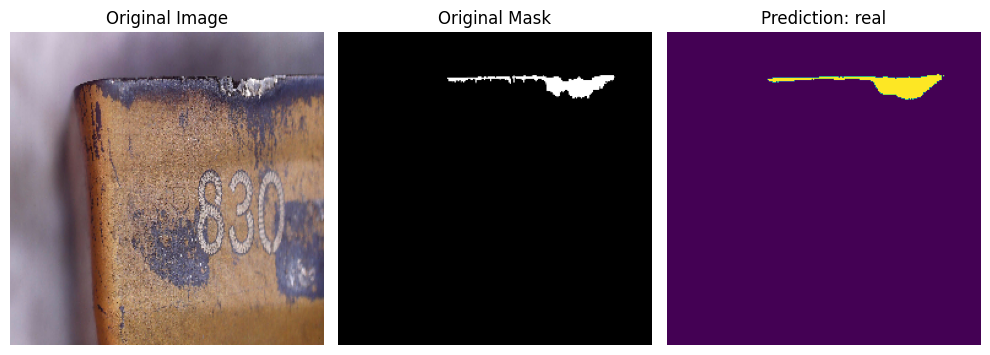

Testing image 5 : 17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


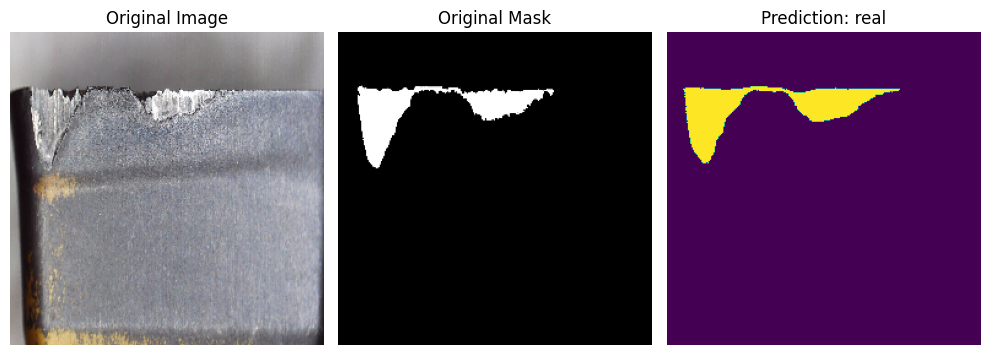

Testing image 6 : 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


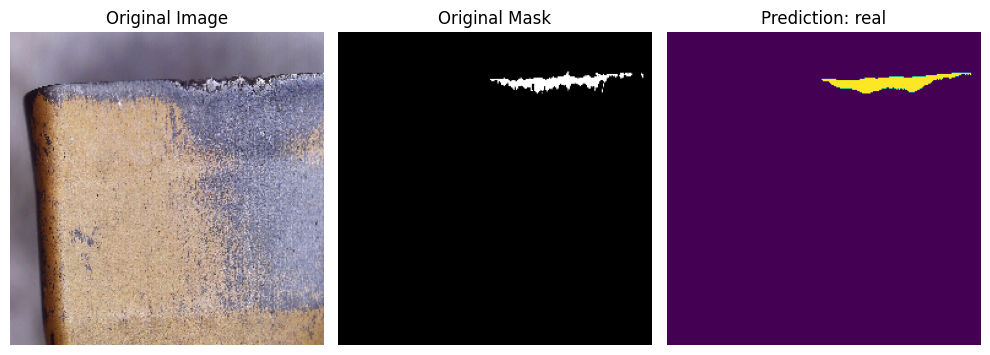

Testing image 7 : 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


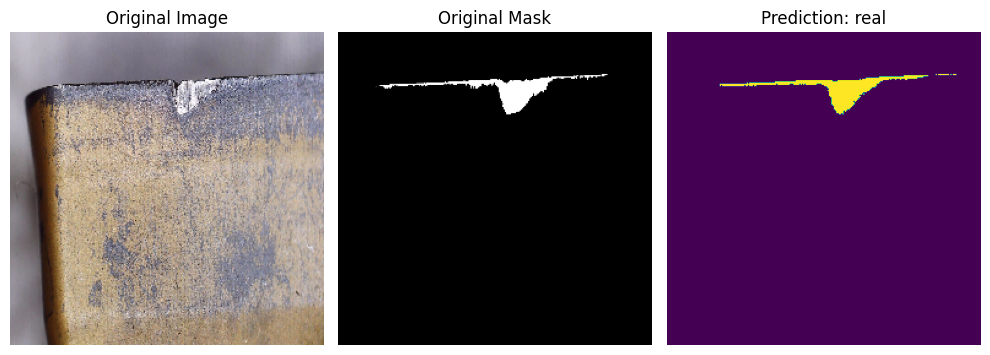

Testing image 8 : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


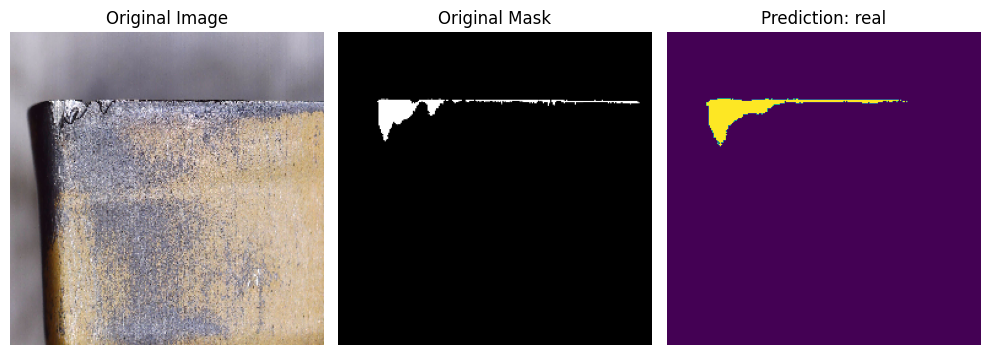

Testing image 9 : 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


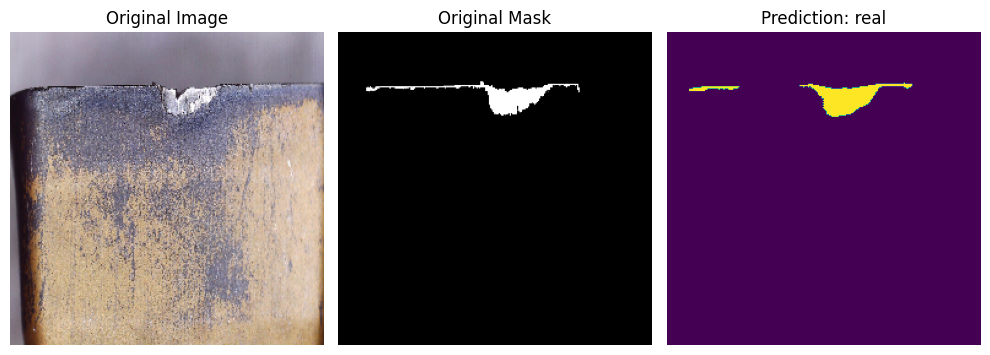

Testing image 10 : 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


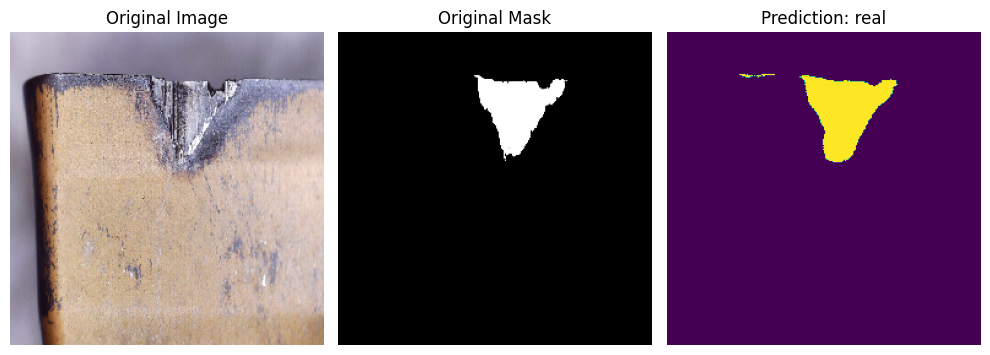

Testing image 11 : 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


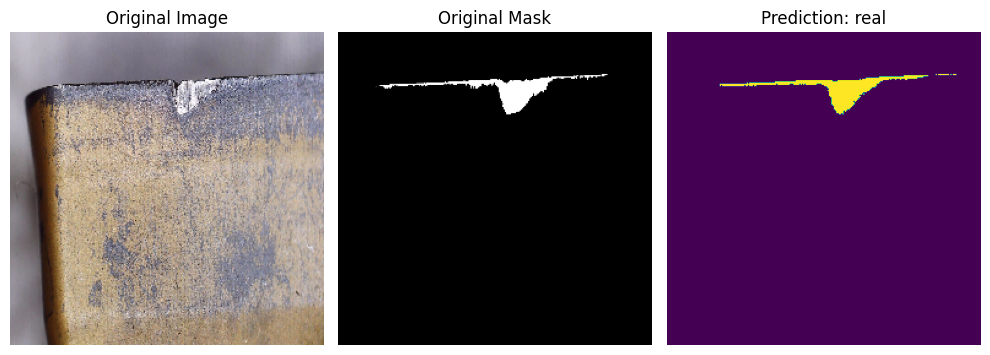

Testing image 12 : 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


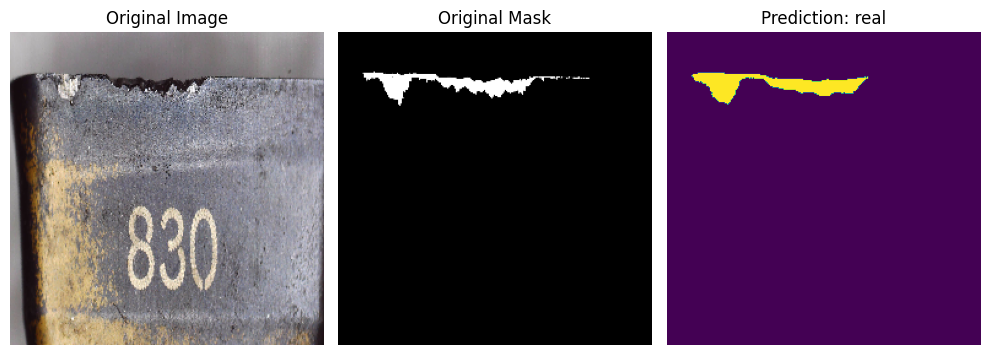

Testing image 13 : 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


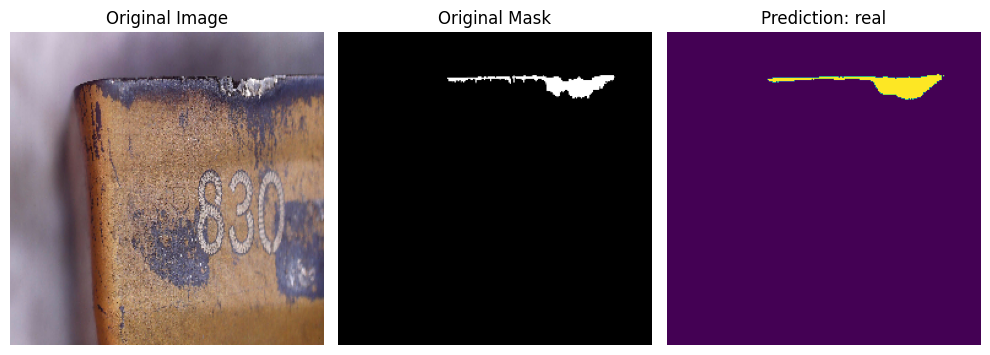

Testing image 14 : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


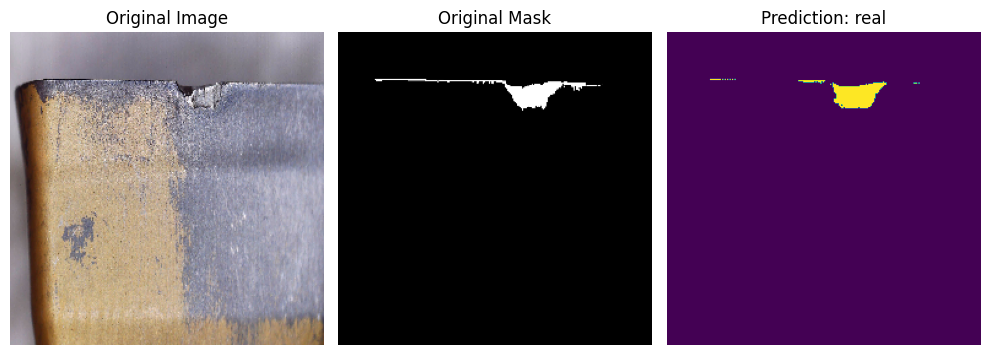

Testing image 15 : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


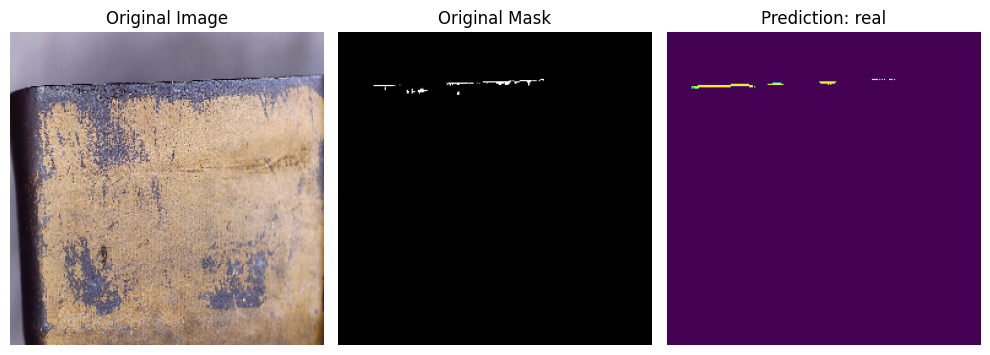

Testing image 16 : 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


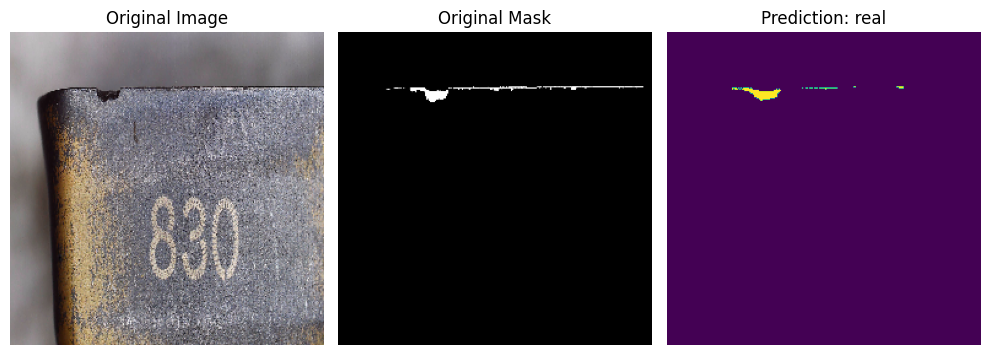

Testing image 17 : 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


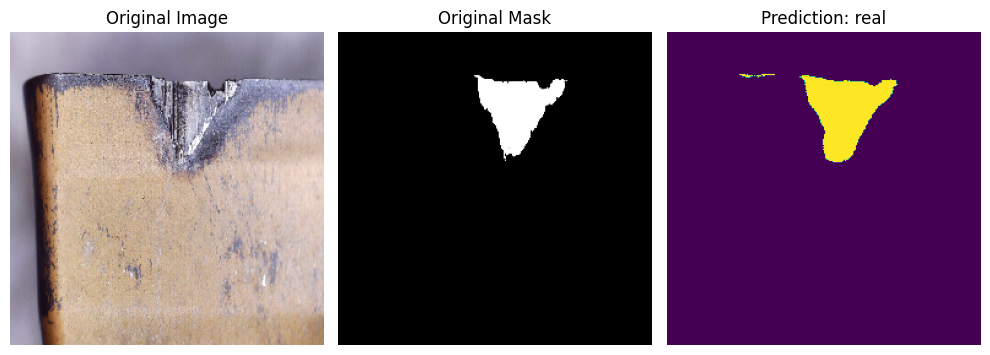

Testing image 18 : 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


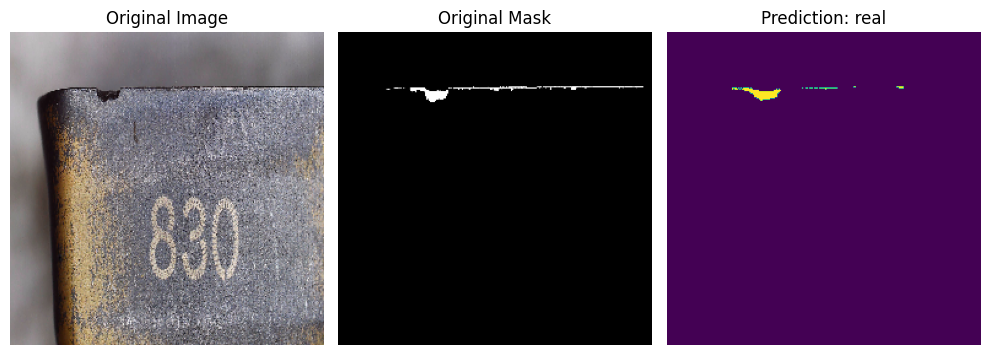

Testing image 19 : 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


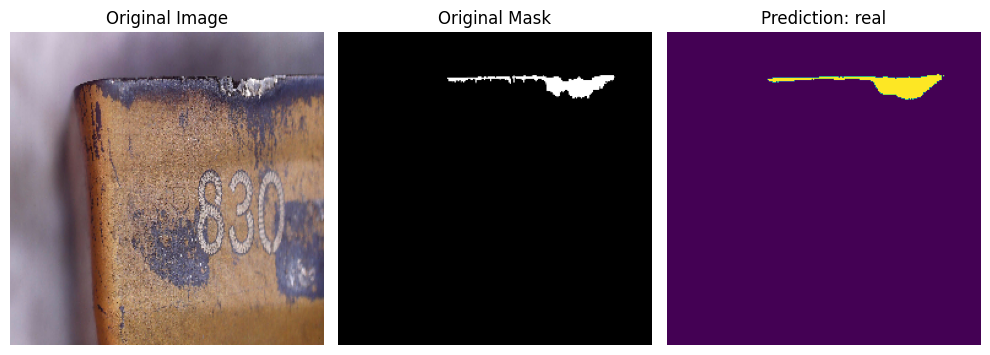

In [48]:
save_dir = 'V_Unet/model_v1_real/test_results/'
model_name = "real"
ValidationAndPrediction.pred_results_tl(TLmodel, test_dataframe, 19, height, width, save_dir, model_name)